In [1]:
from dpks.quant_matrix import QuantMatrix

/home/erikh/dpks/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv")

In [3]:
quantified_data = (
    qm.normalize(
        method="mean",
    )
    .quantify(method="top_n")
)

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

def _generate_data_matrices(
     quantitative_data: QuantMatrix, scale: bool
) -> tuple:
    le = LabelEncoder()
    Y = le.fit_transform(quantitative_data.quantitative_data.var["group"].values)
    X = quantitative_data.quantitative_data.X.copy().transpose()
    X = np.nan_to_num(X, copy=True, nan=0.0)
    if scale:
        X = StandardScaler().fit_transform(X)
    return X, Y

scale = True
X, y = _generate_data_matrices(quantified_data, scale)

In [17]:
param_grid = {
        'min_child_weight': [0.01, 0.1, 0.5, 1, 5, 10, 25],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5, 7, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7,8,9,10,12,15,20],
        'max_leaves': [1, 2,3,4,5,6,7,8,9,10,15,20,25,30],
        "learning_rate": [0.0001,0.001, 0.01, 0.1, 1],
        "reg_alpha": [1e-7, 1e-6, 1e-5, 1e-2, 0.1, 1, 10, 15, 20,40, 60, 100],
        "reg_lambda": [1e-5, 1e-2, 0.1, 1, 5, 15, 20, 25, 100],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 1000],
    'scale_pos_weight': [1, 3, 5, 7, 10, 15]
        }


In [6]:
from sklearn.model_selection import cross_val_score
import xgboost

clf = xgboost.XGBClassifier(

                )

In [20]:
from dpks.param_search import GeneticAlgorithmSearch

gas = GeneticAlgorithmSearch(clf, param_grid, threads=3, pop_size=10, n_generations=20, verbose=True)
gas.run_genetic_algorithm(X, y)

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Generation 0
Accuracy 0.7820146089261135
Best param {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 300, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.5, 'min_child_weight': 5, 'reg_alpha': 1, 'reg_lambda': 0.1, 'eta': 0.9, 'max_delta_step': 5, 'tree_method': 'hist', 'scale_pos_weight': 7}


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Generation 1
Accuracy 0.7919818673058117
Best param {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5, 'colsample_bytree': 0.7, 'gamma': 1, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 1, 'eta': 0.3, 'max_delta_step': 1, 'tree_method': 'exact', 'scale_pos_weight': 1}
Generation 2
Accuracy 0.7926187275755725
Best param {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5, 'colsample_bytree': 0.7, 'gamma': 1, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 1, 'eta': 0.3, 'max_delta_step': 1, 'tree_method': 'exact', 'scale_pos_weight': 1}
Generation 3
Accuracy 0.7973907613756839
Best param {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 600, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': 0.5, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 5, 'eta': 0.7, 'max_delta_step': 1, 'tree_method': 'exact', 'scale_pos_weight': 1}
Generation 4
Accuracy 0.82321193662044
Best param {'learning_rate': 0.1, 'max_depth': 3, 'n

{0: [(0.7820146089261135,
   {'learning_rate': 0.1,
    'max_depth': 11,
    'n_estimators': 300,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 0.5,
    'min_child_weight': 5,
    'reg_alpha': 1,
    'reg_lambda': 0.1,
    'eta': 0.9,
    'max_delta_step': 5,
    'tree_method': 'hist',
    'scale_pos_weight': 7}),
  (0.7411311048999345,
   {'learning_rate': 0.01,
    'max_depth': 5,
    'n_estimators': 600,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'min_child_weight': 10,
    'reg_alpha': 1,
    'reg_lambda': 0.01,
    'eta': 0.1,
    'max_delta_step': 5,
    'tree_method': 'auto',
    'scale_pos_weight': 7}),
  (0.731466449140411,
   {'learning_rate': 0.001,
    'max_depth': 7,
    'n_estimators': 600,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'gamma': 0.5,
    'min_child_weight': 20,
    'reg_alpha': 0.5,
    'reg_lambda': 0,
    'eta': 0.7,
    'max_delta_step': 0,
    'tree_method': 'exact',
    'scale_pos_weight': 3}),
  

<AxesSubplot:xlabel='generation', ylabel='scores'>

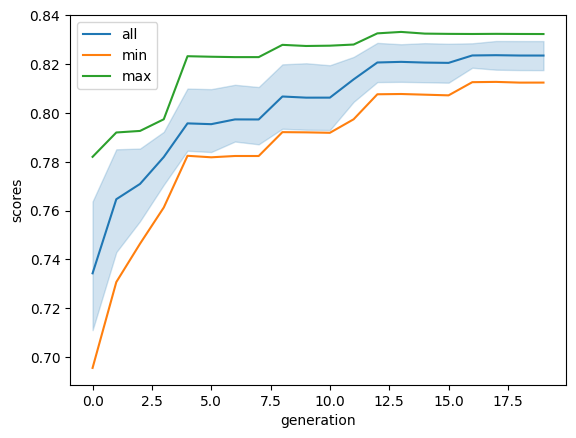

In [21]:
import pandas as pd
import seaborn as sns
populations = gas.populations
plot_dict = {'generation': [], 'scores' : []}
for generation in populations.keys():
    population = populations[generation]
    for individual in population:
        score, d = individual
        plot_dict['generation'].append(generation)
        plot_dict['scores'].append(score)

plot_frame = pd.DataFrame(plot_dict)
max_frame = plot_frame.groupby('generation', as_index=False).max()
min_frame = plot_frame.groupby('generation', as_index=False).min()
sns.lineplot(data=plot_frame, x='generation', y='scores', label='all')
sns.lineplot(data=min_frame, x='generation', y='scores', label='min')
sns.lineplot(data=max_frame, x='generation', y='scores', label='max')


In [14]:
gas.best_estimator_

Accuracy:  0.7771352549439542


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=5,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)